In [53]:
!pip install ydata-profiling
!pip install catboost
!pip install xgboost
!pip install autoviz


   ---------------------------------------- 0.0/67.5 kB ? eta -:--:--
   ------------------------------------ --- 61.4/67.5 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 67.5/67.5 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/125.4 MB ? eta -:--:--
   ---------------------------------------- 0.1/125.4 MB 4.5 MB/s eta 0:00:28
   ---------------------------------------- 0.4/125.4 MB 4.9 MB/s eta 0:00:26
   ---------------------------------------- 1.0/125.4 MB 7.5 MB/s eta 0:00:17
   ---------------------------------------- 1.4/125.4 MB 8.2 MB/s eta 0:00:16
    --------------------------------------- 2.3/125.4 MB 10.4 MB/s eta 0:00:12
    --------------------------------------- 3.0/125.4 MB 10.6 MB/s eta 0:00:12
   - -------------------------------------- 3.6/125.4 MB 11.4 MB/s eta 0:00:11
   - -------------------------------------- 4.3/125.4 MB 11.4 MB/s eta 0:00:11
   - -------------------------------------- 5.0/125.4 MB 12.3 MB/s eta 0:00

  You can safely remove it manually.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import numpy as np
import warnings
warnings.filterwarnings ('ignore')
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Modelling
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR , SVC
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

### Loading Of Data  ###

In [2]:
df = pd.read_excel(r'C:\Users\IFTISUM RAHAMAN\Downloads\Processed_Flipdata.xlsx')

In [3]:
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999


#### Cleaning Of Data

In [4]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


In [6]:
df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.rename(columns={'Unnamed: 0':'S.No.'},inplace= True)

In [9]:
df

,S.No.,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999


### STATISTICS DESCRIPTION FOR NUMERICAL COLUMNS

In [10]:
df.describe()

,S.No.,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201,16228.375231
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553,10793.588322
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.000000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.000000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


### STATISTICS DESCRIPTION FOR CATEGORICAL COLUMN

In [11]:
df.describe(include="object")

,Model,Colour,Rear Camera,Front Camera,Processor_
count,541,541,541,541,541
unique,187,275,14,13,123
top,vivo Y16,Yellow,50MP,16MP,Qualcomm Snapdragon 680
freq,9,12,260,164,33


In [12]:
print(df.dtypes.unique())

[dtype('int64') dtype('O') dtype('float64')]


In [13]:
df.shape

(541, 12)

In [14]:
for i in df.select_dtypes(include= "object").columns:
    print(df[i].value_counts())
    print("***"*10)

Model
vivo Y16                 9
realme C55               9
SAMSUNG Galaxy A14 5G    9
REDMI Note 12 Pro 5G     9
vivo T1 44W              8
                        ..
vivo Y1s                 1
OnePlus Nord             1
Micromax 3               1
vivo Y33s                1
OPPO A77                 1
Name: count, Length: 187, dtype: int64
******************************
Colour
Yellow            12
Royal Blue         8
Power Black        8
Black              8
Midnight Black     7
                  ..
Polar Blue         1
Cosmic grey        1
Sea                1
Infinity Black     1
Sky Blue           1
Name: count, Length: 275, dtype: int64
******************************
Rear Camera
50MP     260
13MP      63
64MP      62
8MP       52
48MP      31
108MP     31
0MP       10
12MP      10
200MP      8
2MP        6
5MP        3
40MP       2
32MP       2
16MP       1
Name: count, dtype: int64
******************************
Front Camera
16MP    164
5MP     135
8MP     129
13MP     49
32MP   

#### Seperating the numerical column and the categorical column

#### Numerical Columns

In [15]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", list(numerical_columns))


Numerical Columns: ['S.No.', 'Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Prize']


#### Categorical Columns

In [16]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", list(categorical_columns))


Categorical Columns: ['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_']


#### Visualizations 

### HISTOGRAM PLOT TO UNDERSTAND THE DATA

Univariate Analysis for S.No.
count    541.000000
mean     289.711645
std      182.359185
min        0.000000
25%      135.000000
50%      273.000000
75%      434.000000
max      642.000000
Name: S.No., dtype: float64


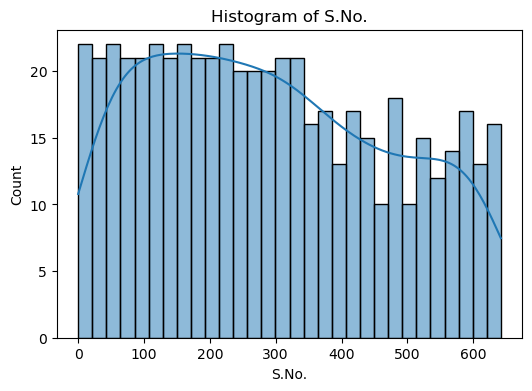

Univariate Analysis for Memory
count    541.000000
mean     110.550832
std       60.600694
min       16.000000
25%       64.000000
50%      128.000000
75%      128.000000
max      256.000000
Name: Memory, dtype: float64


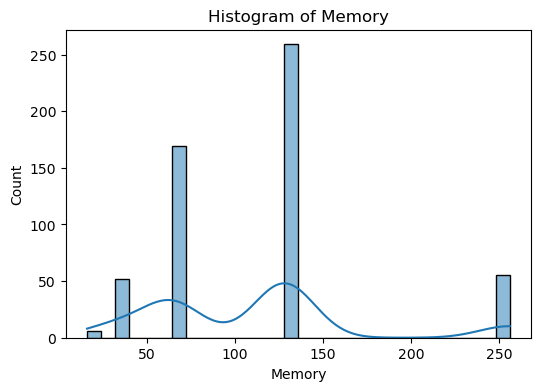

Univariate Analysis for RAM
count    541.000000
mean       5.397412
std        1.984923
min        2.000000
25%        4.000000
50%        6.000000
75%        8.000000
max        8.000000
Name: RAM, dtype: float64


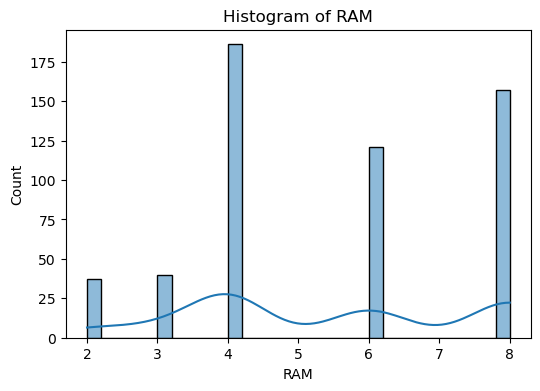

Univariate Analysis for Battery_
count     541.000000
mean     4871.587800
std       780.148862
min       800.000000
25%      5000.000000
50%      5000.000000
75%      5000.000000
max      7000.000000
Name: Battery_, dtype: float64


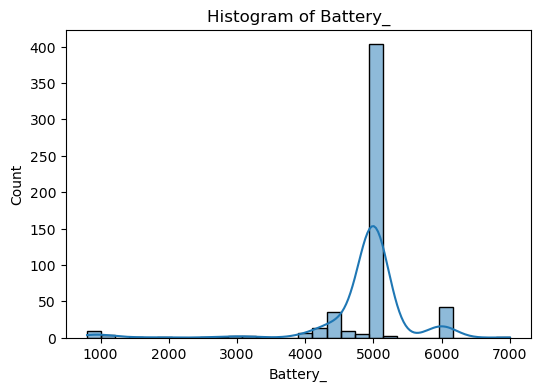

Univariate Analysis for AI Lens
count    541.000000
mean       0.062847
std        0.242911
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: AI Lens, dtype: float64


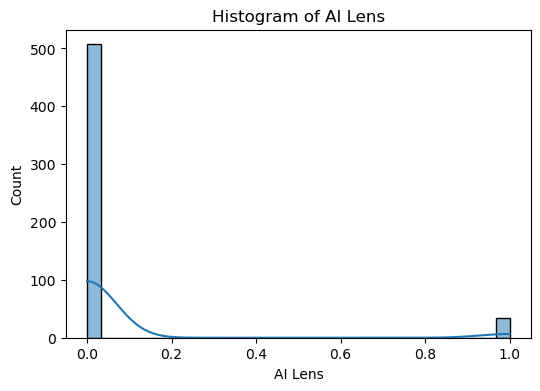

Univariate Analysis for Mobile Height
count    541.000000
mean      16.431201
std        2.523553
min        4.500000
25%       16.510000
50%       16.710000
75%       16.940000
max       41.940000
Name: Mobile Height, dtype: float64


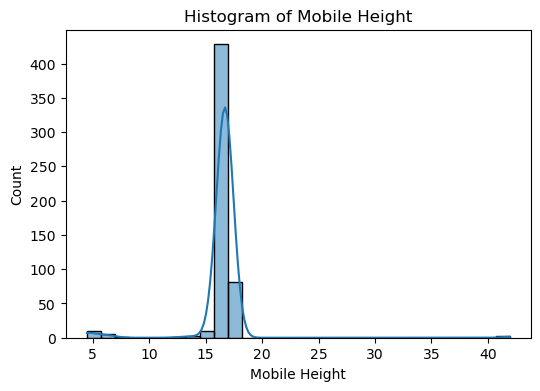

Univariate Analysis for Prize
count      541.000000
mean     16228.375231
std      10793.588322
min        920.000000
25%       9290.000000
50%      13499.000000
75%      19280.000000
max      80999.000000
Name: Prize, dtype: float64


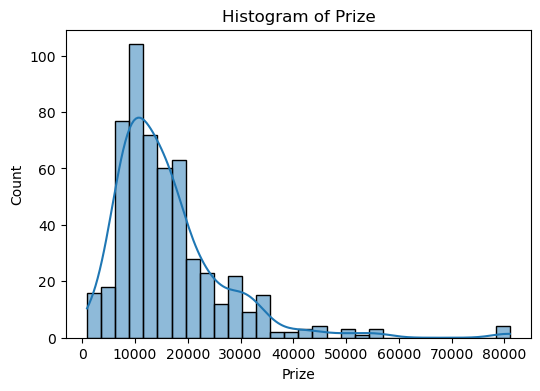

In [18]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    print(f"Univariate Analysis for {col}")
    print(df[col].describe())
    
    # Histogram
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()
    

#### FINDING OF OUTLIERS

In [19]:
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

print(f"Number of Outliers in {col}: {len(outliers)}")
print(outliers)


Number of Outliers in Prize: 25
     S.No.                       Model              Colour  Memory  RAM  \
222    222  SAMSUNG Galaxy S22 Plus 5G       Phantom Black     128    8   
286    289   SAMSUNG Galaxy Z Flip3 5G       Phantom Black     128    8   
305    309     MOTOROLA Edge 30 Fusion         Cosmic grey     128    8   
308    312             Google Pixel 7a                 Sea     128    8   
309    313             Google Pixel 7a            Charcoal     128    8   
327    332             Google Pixel 7a                Snow     128    8   
396    421                 vivo V27 5G          Magic Blue     256    4   
400    427      MOTOROLA Edge 30 Ultra  Interstellar Black     256    4   
416    452              Google Pixel 7                Snow     128    8   
417    453              Google Pixel 7            Obsidian     128    8   
419    455     MOTOROLA Edge 30 Fusion          Solar Gold     128    8   
426    472              Google Pixel 7          Lemongrass     128  

### BOXPLOT TO IDENTIFY THE OUTLIERS

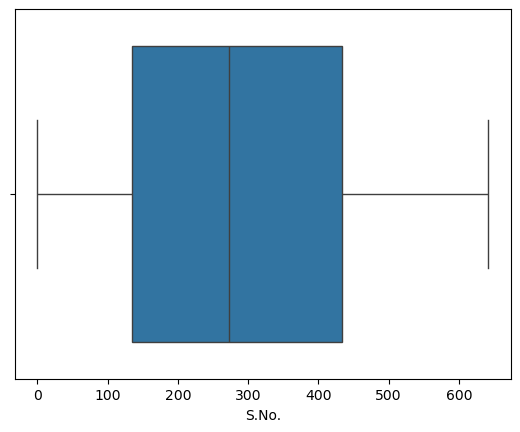

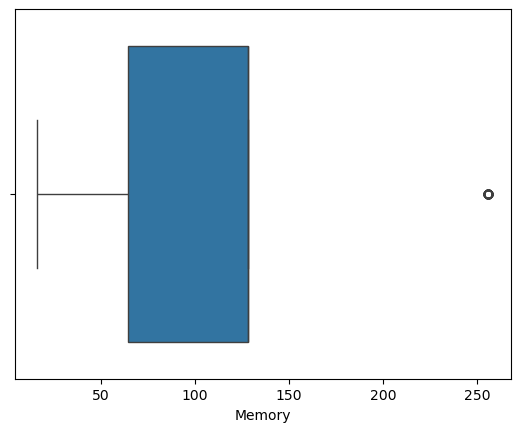

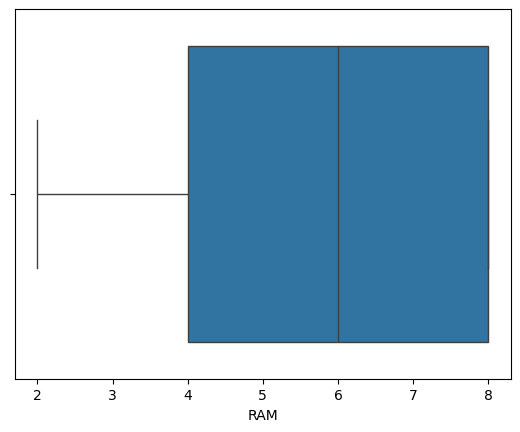

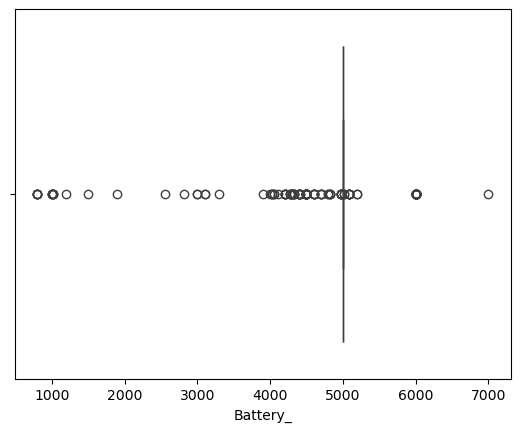

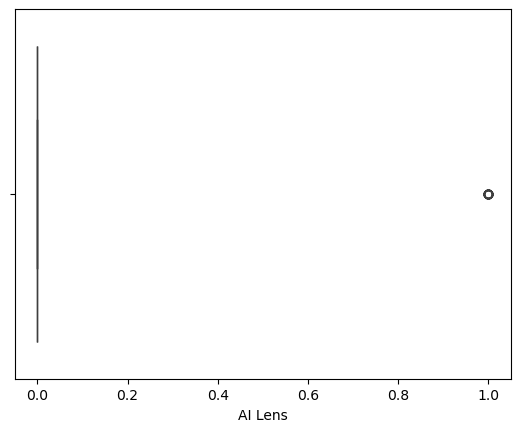

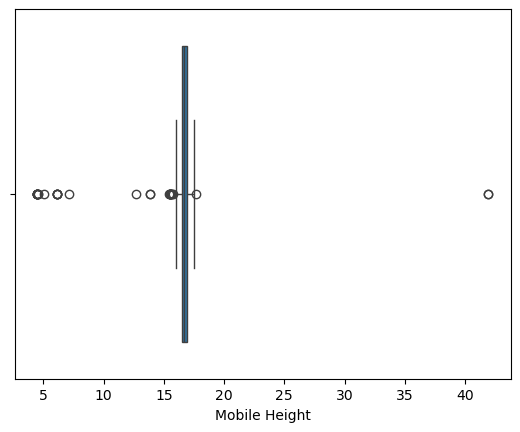

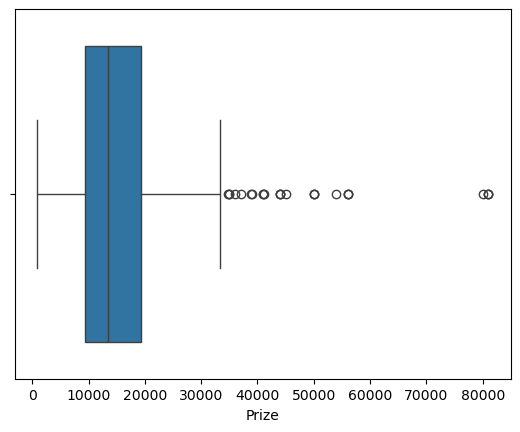

In [20]:
for i in df.select_dtypes(include= "number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [21]:
print("Box Plot Insights:")
print(f"First Quartile (Q1 - 25th percentile): {Q1}")
print(f"Third Quartile (Q3 - 75th percentile): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")

Box Plot Insights:
First Quartile (Q1 - 25th percentile): 9290.0
Third Quartile (Q3 - 75th percentile): 19280.0
Interquartile Range (IQR): 9990.0


### SCATTER PLOT TO UNDERSTAND THE RELATIONSHIPS

In [22]:
df.select_dtypes(include= "number")

,S.No.,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
0,0,64,4,6000,1,16.76,7299
1,1,64,4,6000,1,16.76,7299
2,2,128,8,5000,0,16.64,11999
3,3,32,2,5000,0,16.56,5649
4,4,128,8,5000,1,16.76,8999
...,...,...,...,...,...,...,...
536,637,256,8,3900,0,15.49,79999
537,638,32,2,3100,0,12.70,5998
538,639,64,4,5000,0,16.76,9990
539,641,128,8,5000,0,16.26,38999


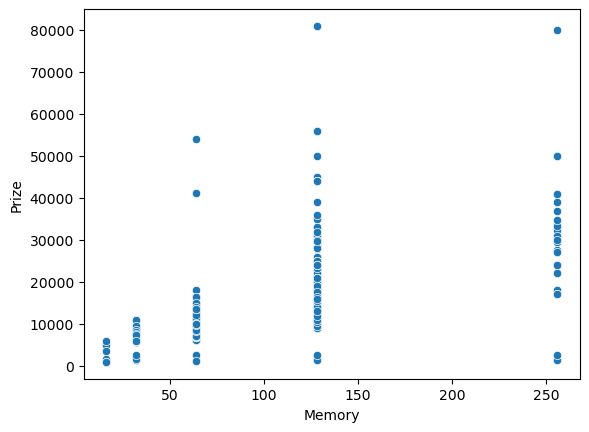

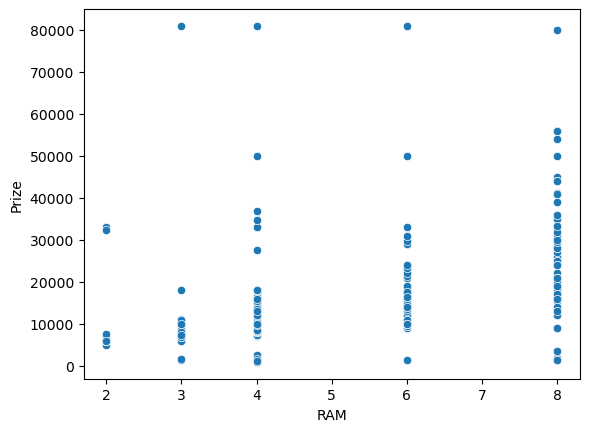

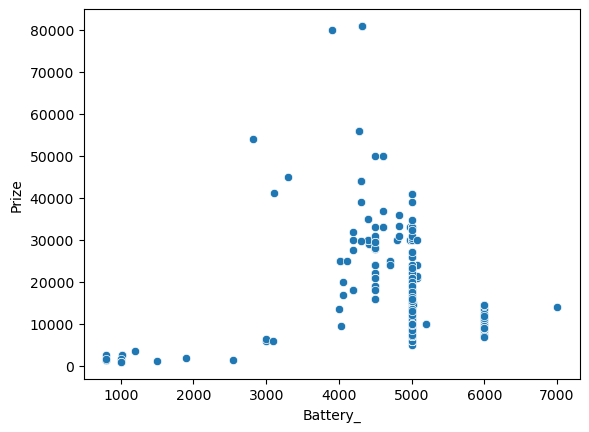

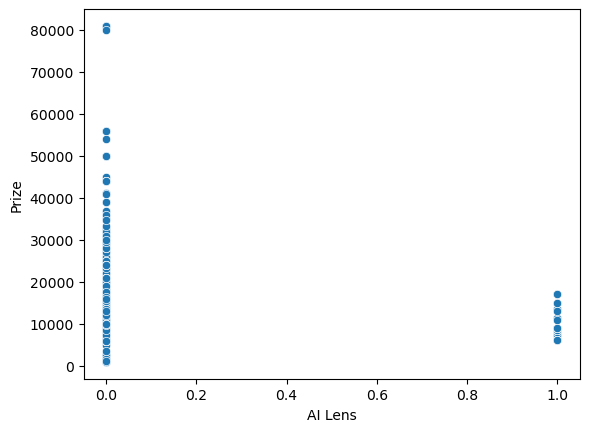

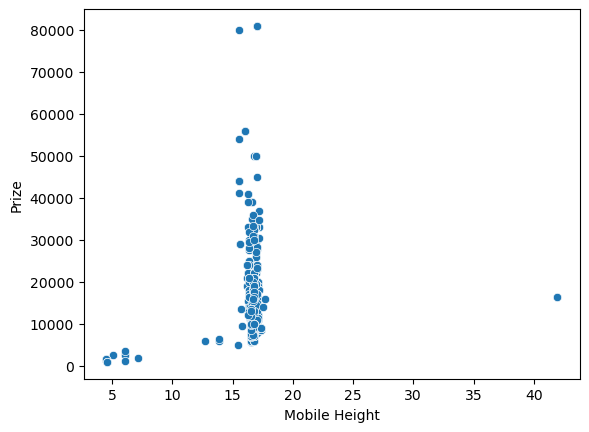

In [23]:
for i in ['Memory',	'RAM',	'Battery_',	'AI Lens',	'Mobile Height']:
    sns.scatterplot(data=df,x=i,y="Prize")
    plt.show()

## PAIRPLOT

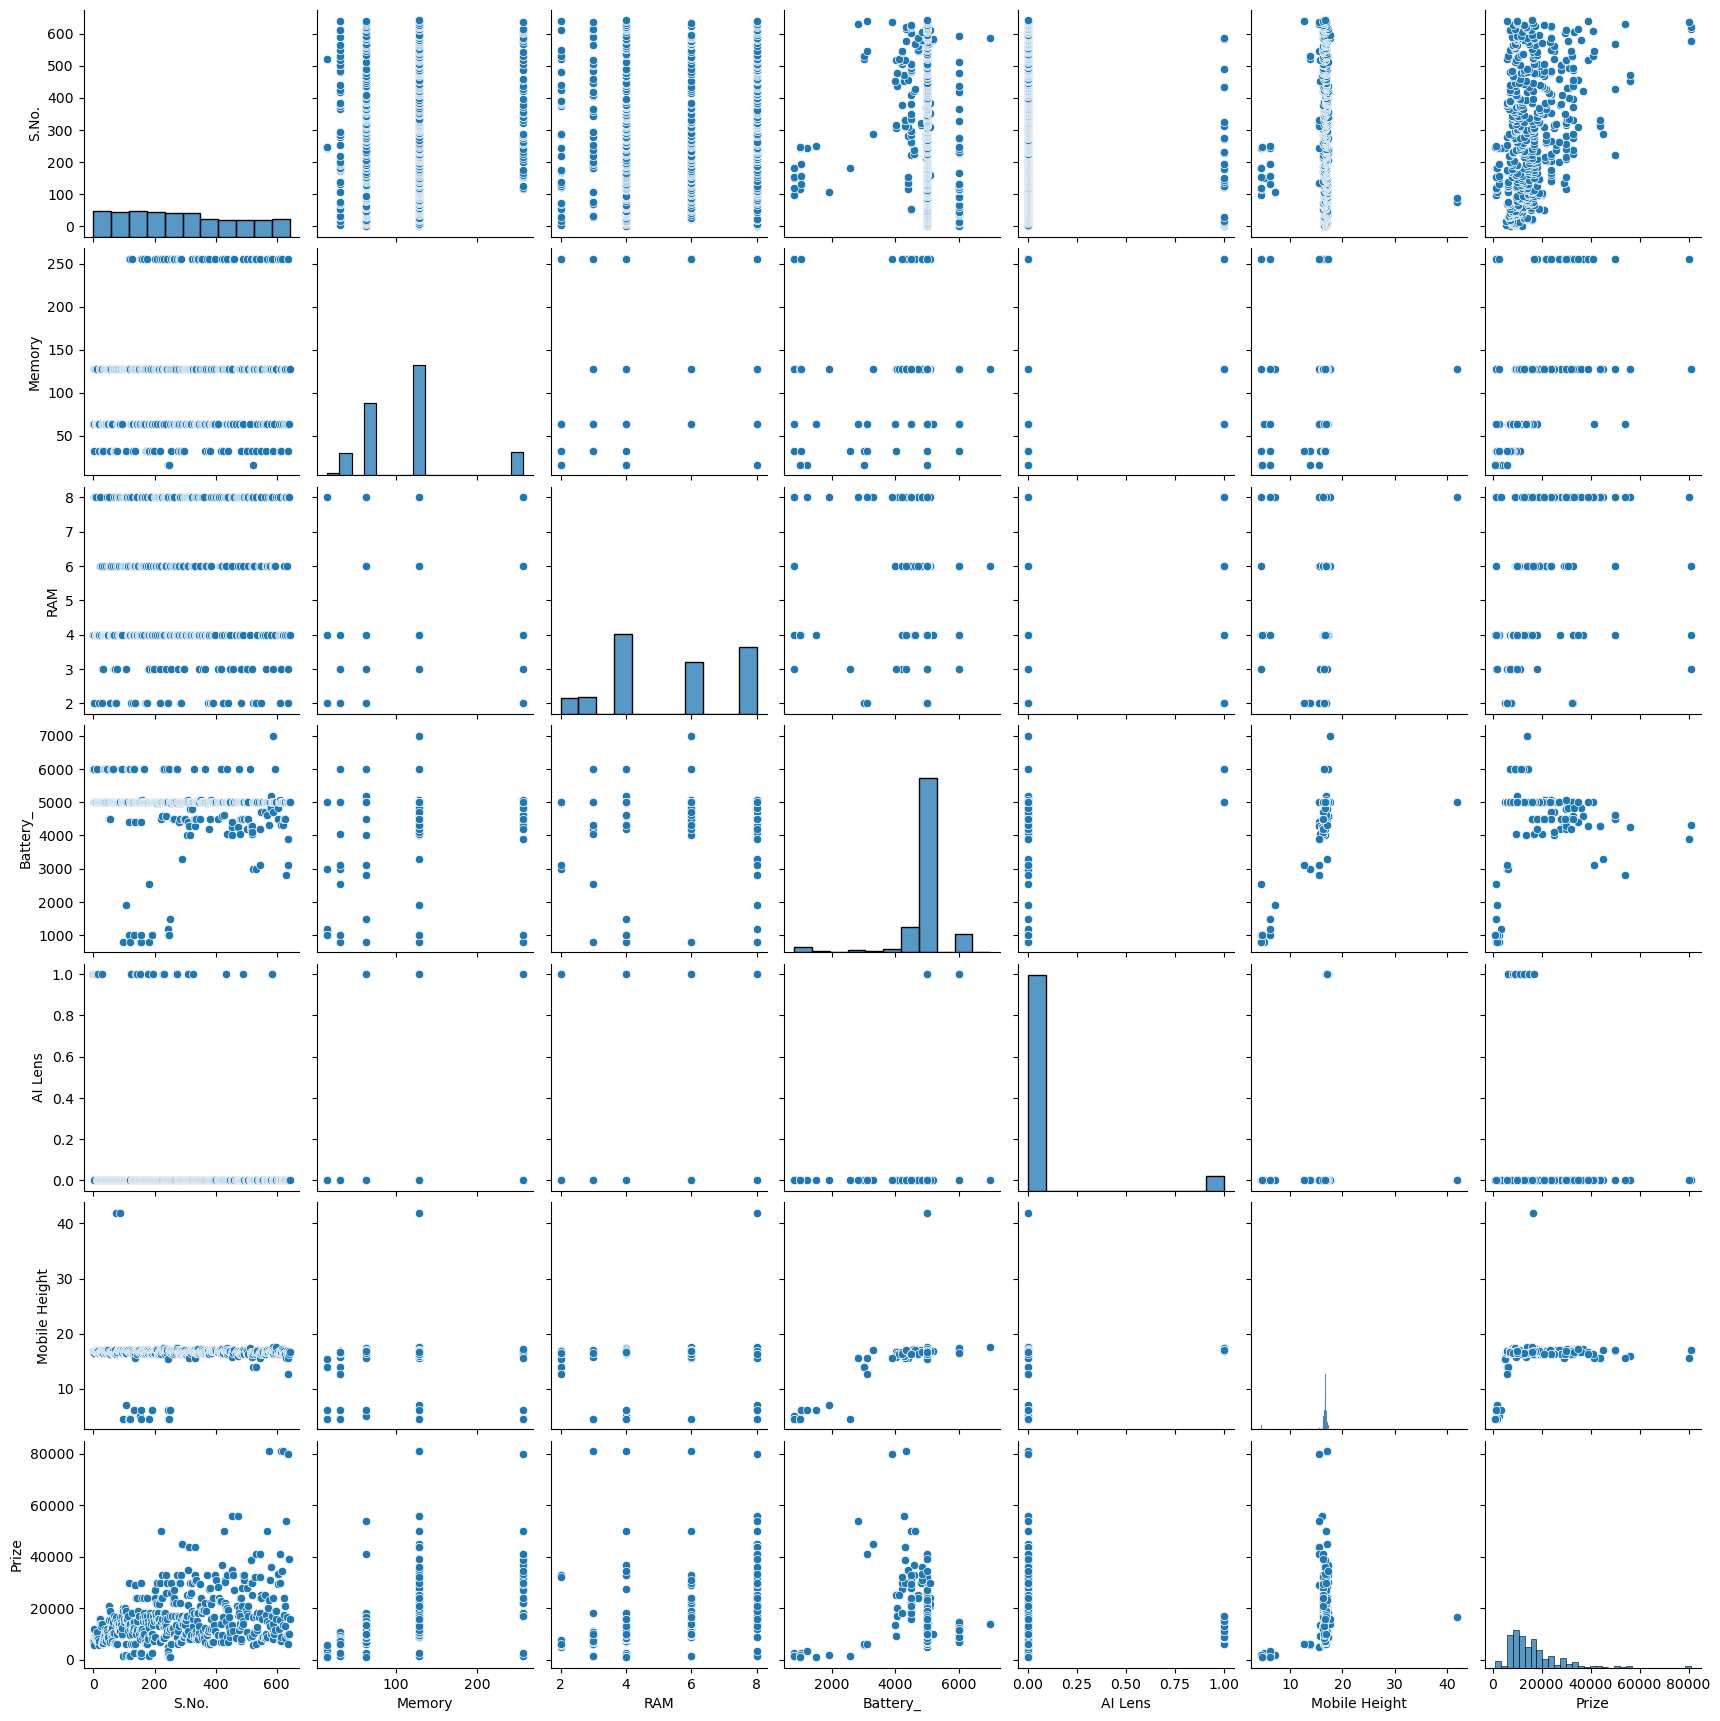

In [24]:
sns.pairplot(data=df)

### CORRELATION WITH HEATMAP TO INTERPRET THE RELATION AND MULTICOLLINIARITY OF THE GIVEN DATASET

In [25]:
df.select_dtypes(include= 'number').corr()

,S.No.,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
S.No.,1.000000,0.120579,0.084103,-0.057136,-0.160373,0.015372,0.333940
Memory,0.120579,1.000000,0.625284,-0.053210,-0.094442,0.063163,0.566660
RAM,0.084103,0.625284,1.000000,-0.104923,-0.082622,0.092951,0.532024
Battery_,-0.057136,-0.053210,-0.104923,1.000000,0.150156,0.695641,-0.034297
AI Lens,-0.160373,-0.094442,-0.082622,0.150156,1.000000,0.052018,-0.153691
Mobile Height,0.015372,0.063163,0.092951,0.695641,0.052018,1.000000,0.176009
Prize,0.333940,0.566660,0.532024,-0.034297,-0.153691,0.176009,1.000000


In [26]:
s=df.select_dtypes(include= 'number').corr()

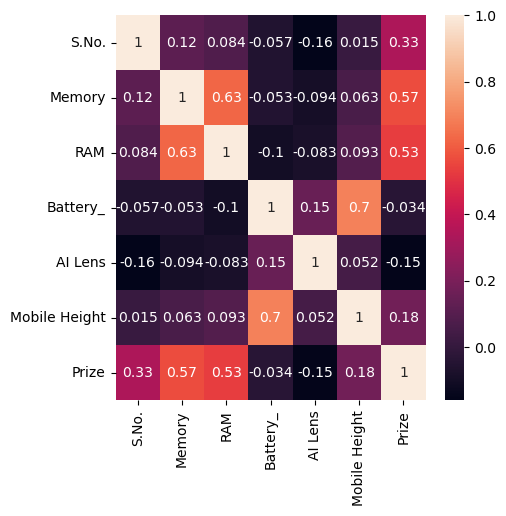

In [27]:
plt.figure(figsize=(5,5))
sns.heatmap(s,annot= True)
plt.show()

### Removing the outliers. (lw= Lower Wisker, uw= Upper Wisker)

In [28]:
df.columns

Index(['S.No.', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize'],
      dtype='object')

In [29]:
def wisker(col):
    q1,q3= np.percentile(col,[25,75])
    iqr= q3-q1
    lw= q1-1.5*iqr
    uw= q3+1.5*iqr
    return lw,uw
    

In [30]:
wisker(df['Prize'])

(-5695.0, 34265.0)

In [31]:
for i in ['Memory',  'Battery_', 'AI Lens','Mobile Height', 'Prize']:
    lw,uw= wisker(df[i])
    df[i]= np.where(df[i]<lw,lw,df[i])
    df[i]= np.where(df[i]>uw,uw,df[i])

In [32]:
df_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] 

print(f"Shape before removing outliers: {df.shape}")
print(f"Shape after removing outliers: {df_cleaned.shape}")


Shape before removing outliers: (541, 12)
Shape after removing outliers: (541, 12)


### VISUALIZATION OF BOXPLOT AFTER REMOVING THE OUTLIERS

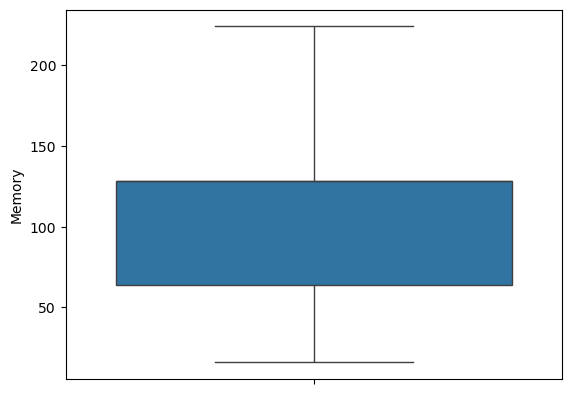

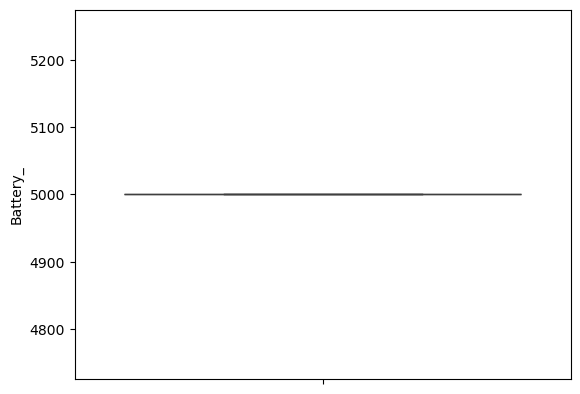

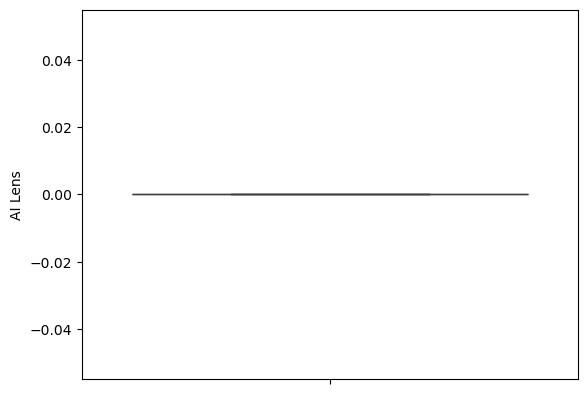

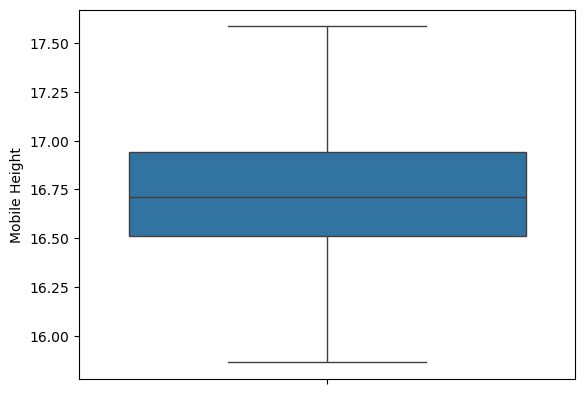

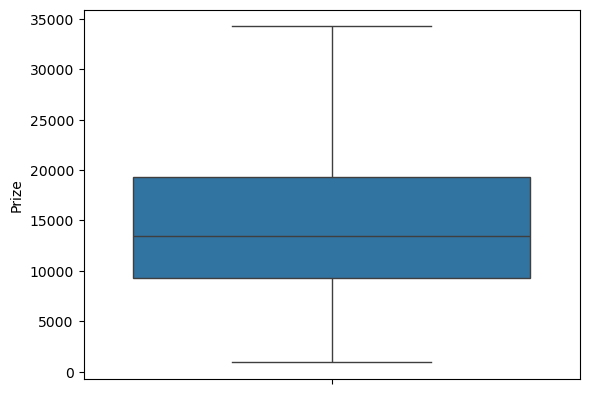

In [33]:
for i in ['Memory',  'Battery_', 'AI Lens','Mobile Height', 'Prize']:
    sns.boxplot(df[i])
    plt.show()

### ONE-HOT ENCODING

In [46]:
df

,S.No.,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0.000000,Infinix SMART 7,Night Black,4.174387,1.609438,8.517393,13MP,5MP,0.0,2.876949,Unisoc Spreadtrum SC9863A1,8.895630
1,0.693147,Infinix SMART 7,Azure Blue,4.174387,1.609438,8.517393,13MP,5MP,0.0,2.876949,Unisoc Spreadtrum SC9863A1,8.895630
2,1.098612,MOTOROLA G32,Mineral Gray,4.859812,2.197225,8.517393,50MP,16MP,0.0,2.870169,Qualcomm Snapdragon 680,9.392662
3,1.386294,POCO C50,Royal Blue,3.496508,1.098612,8.517393,8MP,5MP,0.0,2.865624,Mediatek Helio A22,8.639411
4,1.609438,Infinix HOT 30i,Marigold,4.859812,2.197225,8.517393,50MP,5MP,0.0,2.876949,G37,9.104980
...,...,...,...,...,...,...,...,...,...,...,...,...
536,6.458338,SAMSUNG Galaxy S23 5G,Cream,5.416100,2.197225,8.517393,50MP,12MP,0.0,2.825240,Qualcomm Snapdragon 8 Gen 2,10.441909
537,6.459904,LAVA Z21,Cyan,3.496508,1.098612,8.517393,5MP,2MP,0.0,2.825240,Octa Core,8.699348
538,6.461468,Tecno Spark 8T,Turquoise Cyan,4.174387,1.609438,8.517393,50MP,8MP,0.0,2.876949,MediaTek Helio G35,9.209440
539,6.464588,SAMSUNG Galaxy A54 5G,Awesome Lime,4.859812,2.197225,8.517393,50MP,32MP,0.0,2.848392,"Exynos 1380, Octa Core",10.441909


In [48]:
encoded_prices = pd.get_dummies(data=df, columns=['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_'])


In [49]:
encoded_prices

,S.No.,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize,Model_APPLE iPhone 11,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,Model_Google Pixel 7,Model_Google Pixel 7a,Model_I Kall Z19Pro,Model_I Kall Z19Pro Flash blue,Model_IQOO Neo 7 5G,Model_Infinix HOT 12 Play,Model_Infinix HOT 20 5G,Model_Infinix HOT 20 Play,Model_Infinix HOT 30i,Model_Infinix Hot 11,Model_Infinix Hot 12,Model_Infinix Hot 12 Pro,Model_Infinix Hot 20 5G,Model_Infinix NOTE 12i,Model_Infinix Note 11s Free Fire Edition,Model_Infinix Note 12,Model_Infinix Note 12 5G,Model_Infinix Note 12 Pro,Model_Infinix Note 12 Pro 5G,Model_Infinix SMART 7,Model_Infinix Smart 5A,Model_Infinix Smart 6,Model_Infinix Smart 6 HD,Model_Infinix Smart 7 HD,Model_Infinix Zero 20,Model_Infinix Zero 5G 2023,Model_Infinix Zero 5G 2023 TURBO,Model_LAVA Z2,Model_LAVA Z21,Model_MOTOROLA Edge 30,Model_MOTOROLA Edge 30 Fusion,Model_MOTOROLA Edge 30 Ultra,Model_MOTOROLA Edge 40,Model_MOTOROLA G32,Model_MOTOROLA G42,Model_MOTOROLA G62 5G,Model_MOTOROLA e13,Model_MOTOROLA e22s,Model_MOTOROLA e32,Model_MOTOROLA e40,Model_MOTOROLA g13,Model_MOTOROLA g22,Model_MOTOROLA g31,Model_MOTOROLA g42,Model_MOTOROLA g52,Model_MOTOROLA g72,Model_MOTOROLA g73 5G,Model_MOTOROLA g82 5G,Model_Micromax 3,Model_Micromax IN 2C,Model_Nokia C01 Plus,Model_Nokia G11 Plus,Model_OPPO A17,Model_OPPO A17K,Model_OPPO A17k,Model_OPPO A77,Model_OPPO A77s,Model_OPPO A78 5G,Model_OPPO F21 Pro,Model_OPPO F21s Pro,Model_OPPO Reno8T 5G,Model_OnePlus 8,Model_OnePlus Nord,Model_OnePlus Nord 2T 5G,Model_POCO C31,Model_POCO C50,Model_POCO C51,Model_POCO C55,Model_POCO F1,Model_POCO F5 5G,Model_POCO M3 Pro 5G,Model_POCO M4 5G,Model_POCO M4 Pro,Model_POCO M4 Pro 5G,Model_POCO M5,Model_POCO X2,Model_POCO X4 Pro 5G,Model_POCO X5 5G,Model_POCO X5 Pro 5G,Model_REDMI 10,Model_REDMI 10 Prime 2022,Model_REDMI 10A SPORT,Model_REDMI 11 Prime,Model_REDMI 12c,Model_REDMI 9 Activ,Model_REDMI 9i,Model_REDMI A1+,Model_REDMI K50i 5G,Model_REDMI Note 10 Lite,Model_REDMI Note 10S,Model_REDMI Note 11,Model_REDMI Note 11S,Model_REDMI Note 11T 5G,Model_REDMI Note 12,Model_REDMI Note 12 5G,Model_REDMI Note 12 Pro 5G,Model_REDMI Note 12 Pro+ 5G,Model_REDMI Note 9,Model_Redmi 9A Sport,Model_SAMSUNG Galaxy A04,Model_SAMSUNG Galaxy A04e,Model_SAMSUNG Galaxy A13,Model_SAMSUNG Galaxy A14 5G,Model_SAMSUNG Galaxy A23,Model_SAMSUNG Galaxy A23 5G,Model_SAMSUNG Galaxy A34 5G,Model_SAMSUNG Galaxy A54 5G,Model_SAMSUNG Galaxy F04,Model_SAMSUNG Galaxy F13,Model_SAMSUNG Galaxy F14 5G,Model_SAMSUNG Galaxy F23 5G,Model_SAMSUNG Galaxy M04,Model_SAMSUNG Galaxy S21 FE 5G,Model_SAMSUNG Galaxy S22 Plus 5G,Model_SAMSUNG Galaxy S23 5G,Model_SAMSUNG Galaxy Z Flip3 5G,Model_SAMSUNG M53 5G,Model_Tecno Pop 5 Pro,Model_Tecno Pova 3,Model_Tecno Spark 8T,Model_Tecno Spark 9,Model_Tecno Spark 9T,Model_Tecno Spark Go 2023,Model_itel A60,Model_micromax,Model_micromax 1,Model_micromax 2,Model_micromax 3,Model_micromax1,Model_nothing phone 1,Model_realme 10,Model_realme 10 Pro 5G,Model_realme 10 Pro+ 5G,Model_realme 8,Model_realme 8i,Model_realme 9 5G,Model_realme 9 5G SE,Model_realme 9 Pro+ 5G,Model_realme 9i,Model_realme 9i 5G,Model_realme C11 2021,Model_realme C21Y,Model_realme C25s,Model_realme C30,Model_realme C30s,Model_realme C31,Model_realme C33,Model_realme C33 2023,Model_realme C35,Model_realme C55,Model_realme GT 2,Model_realme NARZO 50A PRIME,Model_realme Narzo 30,Model_realme Narzo 30 Pro 5G,Model_realme Narzo 50,Model_realme Narzo 50A,Model_realme Narzo 50A Prime,Model_realme Narzo 50i,Model_realme Narzo 50i Prime,Model_realme Narzo N55,Model_realme X3 SuperZoom,Model_realme narzo 50i Prime,Model_redmi max,Model_redmi min,Model_redmi mono,Model_vivo T1 44W,Model_vivo T1 Pro 5G,Model_vivo T2 5G,Model_vivo T2x 5G,Model_vivo V23 5G,Model_vivo V25 5G,Model_vivo V25 Pro 5G,Model_vivo V27 5G,Model_vivo Y100 5G,Model_vivo Y12G,Model_vivo Y16,Model_vivo Y1s,Model_vivo Y21T,Model_vivo Y33s,Model_vivo Y35,Model_vivo Y56 5G,Model_vivo Y565G,Model_vivo Y75,Colour_7Â°

In [55]:
encoded_data= pd.get_dummies(data= df, columns=['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_']).astype('Sparse[int]')


In [56]:
encoded_data

,S.No.,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize,Model_APPLE iPhone 11,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,Model_Google Pixel 7,Model_Google Pixel 7a,Model_I Kall Z19Pro,Model_I Kall Z19Pro Flash blue,Model_IQOO Neo 7 5G,Model_Infinix HOT 12 Play,Model_Infinix HOT 20 5G,Model_Infinix HOT 20 Play,Model_Infinix HOT 30i,Model_Infinix Hot 11,Model_Infinix Hot 12,Model_Infinix Hot 12 Pro,Model_Infinix Hot 20 5G,Model_Infinix NOTE 12i,Model_Infinix Note 11s Free Fire Edition,Model_Infinix Note 12,Model_Infinix Note 12 5G,Model_Infinix Note 12 Pro,Model_Infinix Note 12 Pro 5G,Model_Infinix SMART 7,Model_Infinix Smart 5A,Model_Infinix Smart 6,Model_Infinix Smart 6 HD,Model_Infinix Smart 7 HD,Model_Infinix Zero 20,Model_Infinix Zero 5G 2023,Model_Infinix Zero 5G 2023 TURBO,Model_LAVA Z2,Model_LAVA Z21,Model_MOTOROLA Edge 30,Model_MOTOROLA Edge 30 Fusion,Model_MOTOROLA Edge 30 Ultra,Model_MOTOROLA Edge 40,Model_MOTOROLA G32,Model_MOTOROLA G42,Model_MOTOROLA G62 5G,Model_MOTOROLA e13,Model_MOTOROLA e22s,Model_MOTOROLA e32,Model_MOTOROLA e40,Model_MOTOROLA g13,Model_MOTOROLA g22,Model_MOTOROLA g31,Model_MOTOROLA g42,Model_MOTOROLA g52,Model_MOTOROLA g72,Model_MOTOROLA g73 5G,Model_MOTOROLA g82 5G,Model_Micromax 3,Model_Micromax IN 2C,Model_Nokia C01 Plus,Model_Nokia G11 Plus,Model_OPPO A17,Model_OPPO A17K,Model_OPPO A17k,Model_OPPO A77,Model_OPPO A77s,Model_OPPO A78 5G,Model_OPPO F21 Pro,Model_OPPO F21s Pro,Model_OPPO Reno8T 5G,Model_OnePlus 8,Model_OnePlus Nord,Model_OnePlus Nord 2T 5G,Model_POCO C31,Model_POCO C50,Model_POCO C51,Model_POCO C55,Model_POCO F1,Model_POCO F5 5G,Model_POCO M3 Pro 5G,Model_POCO M4 5G,Model_POCO M4 Pro,Model_POCO M4 Pro 5G,Model_POCO M5,Model_POCO X2,Model_POCO X4 Pro 5G,Model_POCO X5 5G,Model_POCO X5 Pro 5G,Model_REDMI 10,Model_REDMI 10 Prime 2022,Model_REDMI 10A SPORT,Model_REDMI 11 Prime,Model_REDMI 12c,Model_REDMI 9 Activ,Model_REDMI 9i,Model_REDMI A1+,Model_REDMI K50i 5G,Model_REDMI Note 10 Lite,Model_REDMI Note 10S,Model_REDMI Note 11,Model_REDMI Note 11S,Model_REDMI Note 11T 5G,Model_REDMI Note 12,Model_REDMI Note 12 5G,Model_REDMI Note 12 Pro 5G,Model_REDMI Note 12 Pro+ 5G,Model_REDMI Note 9,Model_Redmi 9A Sport,Model_SAMSUNG Galaxy A04,Model_SAMSUNG Galaxy A04e,Model_SAMSUNG Galaxy A13,Model_SAMSUNG Galaxy A14 5G,Model_SAMSUNG Galaxy A23,Model_SAMSUNG Galaxy A23 5G,Model_SAMSUNG Galaxy A34 5G,Model_SAMSUNG Galaxy A54 5G,Model_SAMSUNG Galaxy F04,Model_SAMSUNG Galaxy F13,Model_SAMSUNG Galaxy F14 5G,Model_SAMSUNG Galaxy F23 5G,Model_SAMSUNG Galaxy M04,Model_SAMSUNG Galaxy S21 FE 5G,Model_SAMSUNG Galaxy S22 Plus 5G,Model_SAMSUNG Galaxy S23 5G,Model_SAMSUNG Galaxy Z Flip3 5G,Model_SAMSUNG M53 5G,Model_Tecno Pop 5 Pro,Model_Tecno Pova 3,Model_Tecno Spark 8T,Model_Tecno Spark 9,Model_Tecno Spark 9T,Model_Tecno Spark Go 2023,Model_itel A60,Model_micromax,Model_micromax 1,Model_micromax 2,Model_micromax 3,Model_micromax1,Model_nothing phone 1,Model_realme 10,Model_realme 10 Pro 5G,Model_realme 10 Pro+ 5G,Model_realme 8,Model_realme 8i,Model_realme 9 5G,Model_realme 9 5G SE,Model_realme 9 Pro+ 5G,Model_realme 9i,Model_realme 9i 5G,Model_realme C11 2021,Model_realme C21Y,Model_realme C25s,Model_realme C30,Model_realme C30s,Model_realme C31,Model_realme C33,Model_realme C33 2023,Model_realme C35,Model_realme C55,Model_realme GT 2,Model_realme NARZO 50A PRIME,Model_realme Narzo 30,Model_realme Narzo 30 Pro 5G,Model_realme Narzo 50,Model_realme Narzo 50A,Model_realme Narzo 50A Prime,Model_realme Narzo 50i,Model_realme Narzo 50i Prime,Model_realme Narzo N55,Model_realme X3 SuperZoom,Model_realme narzo 50i Prime,Model_redmi max,Model_redmi min,Model_redmi mono,Model_vivo T1 44W,Model_vivo T1 Pro 5G,Model_vivo T2 5G,Model_vivo T2x 5G,Model_vivo V23 5G,Model_vivo V25 5G,Model_vivo V25 Pro 5G,Model_vivo V27 5G,Model_vivo Y100 5G,Model_vivo Y12G,Model_vivo Y16,Model_vivo Y1s,Model_vivo Y21T,Model_vivo Y33s,Model_vivo Y35,Model_vivo Y56 5G,Model_vivo Y565G,Model_vivo Y75,Colour_7Â°

THUS FROM THE ABOVE VISUALIZATION OF THE BOXPLOT WE CAN SEE THAT THERE IS NO OUTLIERS IS PRESENT.

#### AutoViz

In [34]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [35]:
plt.rcParams['figure.figsize'] = [10, 6] 
sep = ","
dft = AV.AutoViz(
    df,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=1500,
    max_cols_analyzed=37,
    # explorative=True,
    #minimal=True ,
)

Shape of your Data Set loaded: (541, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    12 Predictors classified...
        3 variable(s) removed since they were ID or low-information variables
    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
S.No.,int64,0.000000,100,0.000000,642.000000,Possible ID column: drop before modeling step.
Model,object,0.000000,34,,,Possible high cardinality column with 187 unique values: Use hash encoding or text embedding to reduce dimension.
Colour,object,0.000000,50,,,Possible high cardinality column with 275 unique values: Use hash encoding or text embedding to reduce dimension.
Memory,float64,0.000000,NA,16.000000,224.000000,No issue
RAM,int64,0.000000,0,2.000000,8.000000,No issue
Battery_,float64,0.000000,0,5000.000000,5000.000000,Possible Zero-variance or low information colum: drop before modeling step.
Rear Camera,object,0.000000,2,,,"4 rare categories: ['5MP', '40MP', '32MP', '16MP']. Group them into a single category or drop the categories."
Front Camera,object,0.000000,2,,,"5 rare categories: ['60MP', '2MP', '10MP', '20MP', '44MP']. Group them into a single category or drop the categories."
AI Lens,float64,0.000000,0,0.000000,0.000000,Possible Zero-variance or low information colum: drop before modeling step.
Mobile Height,float64,0.000000,NA,15.865000,17.585000,No issue


Number of All Scatter Plots = 6


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to C:\Users\IFTISUM
[nltk_data]    |     RAHAMAN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to C:\Users\IFTISUM
[nltk_data]    |     RAHAMAN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to C:\Users\IFTISUM
[nltk_data]    |     RAHAMAN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to C:\Users\IFTISUM
[nltk_data]    |     RAHAMAN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to C:\Users\IFTISUM
[nltk_data]    |     RAHAMAN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | D

Could not draw wordcloud plot for Model. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for Colour. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for Processor_. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://

### SKEWNESS

In [64]:
df[numerical_data] = np.log(df[numerical_data] + 1) 
df[numerical_data].skew ()

S.No.           -3.271237
Memory          -0.890489
RAM             -0.598983
Battery_         0.000000
AI Lens          0.000000
Mobile Height   -0.619562
Prize           -1.408509
dtype: float64

### PREPROCESSING OF THE DATA

In [73]:
#df['Mobile Height'] = df['Mobile Height'].round().astype(int)
#df.info ()

In [74]:
# Drop dependent feature
x= df.drop (["Prize"], axis =1)

# select dependent feature
y= df["Prize"]

In [75]:
numerical_data1 = x.select_dtypes(include = ['number'])
categorical_data1 = x.select_dtypes(include = ['object']).columns

In [76]:
# dummy varaibale
dummy_drop = []
clean_df = x
for i in categorical_data1:
    dummy_drop += [i + '_' + str(x[i].unique()[-1])]

x = pd.get_dummies(x, columns = categorical_data1)
x = x.drop(dummy_drop, axis = 1)
x.shape 

(541, 613)

In [77]:
x.head(5)

,S.No.,Memory,RAM,Battery_,AI Lens,Mobile Height,Model_APPLE iPhone 11,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,Model_Google Pixel 7,Model_Google Pixel 7a,Model_I Kall Z19Pro,Model_I Kall Z19Pro Flash blue,Model_IQOO Neo 7 5G,Model_Infinix HOT 12 Play,Model_Infinix HOT 20 5G,Model_Infinix HOT 20 Play,Model_Infinix HOT 30i,Model_Infinix Hot 11,Model_Infinix Hot 12,Model_Infinix Hot 12 Pro,Model_Infinix Hot 20 5G,Model_Infinix NOTE 12i,Model_Infinix Note 11s Free Fire Edition,Model_Infinix Note 12,Model_Infinix Note 12 5G,Model_Infinix Note 12 Pro,Model_Infinix Note 12 Pro 5G,Model_Infinix SMART 7,Model_Infinix Smart 5A,Model_Infinix Smart 6,Model_Infinix Smart 6 HD,Model_Infinix Smart 7 HD,Model_Infinix Zero 20,Model_Infinix Zero 5G 2023,Model_Infinix Zero 5G 2023 TURBO,Model_LAVA Z2,Model_LAVA Z21,Model_MOTOROLA Edge 30,Model_MOTOROLA Edge 30 Fusion,Model_MOTOROLA Edge 30 Ultra,Model_MOTOROLA Edge 40,Model_MOTOROLA G32,Model_MOTOROLA G42,Model_MOTOROLA G62 5G,Model_MOTOROLA e13,Model_MOTOROLA e22s,Model_MOTOROLA e32,Model_MOTOROLA e40,Model_MOTOROLA g13,Model_MOTOROLA g22,Model_MOTOROLA g31,Model_MOTOROLA g42,Model_MOTOROLA g52,Model_MOTOROLA g72,Model_MOTOROLA g73 5G,Model_MOTOROLA g82 5G,Model_Micromax 3,Model_Micromax IN 2C,Model_Nokia C01 Plus,Model_Nokia G11 Plus,Model_OPPO A17,Model_OPPO A17K,Model_OPPO A17k,Model_OPPO A77s,Model_OPPO A78 5G,Model_OPPO F21 Pro,Model_OPPO F21s Pro,Model_OPPO Reno8T 5G,Model_OnePlus 8,Model_OnePlus Nord,Model_OnePlus Nord 2T 5G,Model_POCO C31,Model_POCO C50,Model_POCO C51,Model_POCO C55,Model_POCO F1,Model_POCO F5 5G,Model_POCO M3 Pro 5G,Model_POCO M4 5G,Model_POCO M4 Pro,Model_POCO M4 Pro 5G,Model_POCO M5,Model_POCO X2,Model_POCO X4 Pro 5G,Model_POCO X5 5G,Model_POCO X5 Pro 5G,Model_REDMI 10,Model_REDMI 10 Prime 2022,Model_REDMI 10A SPORT,Model_REDMI 11 Prime,Model_REDMI 12c,Model_REDMI 9 Activ,Model_REDMI 9i,Model_REDMI A1+,Model_REDMI K50i 5G,Model_REDMI Note 10 Lite,Model_REDMI Note 10S,Model_REDMI Note 11,Model_REDMI Note 11S,Model_REDMI Note 11T 5G,Model_REDMI Note 12,Model_REDMI Note 12 5G,Model_REDMI Note 12 Pro 5G,Model_REDMI Note 12 Pro+ 5G,Model_REDMI Note 9,Model_Redmi 9A Sport,Model_SAMSUNG Galaxy A04,Model_SAMSUNG Galaxy A04e,Model_SAMSUNG Galaxy A13,Model_SAMSUNG Galaxy A14 5G,Model_SAMSUNG Galaxy A23,Model_SAMSUNG Galaxy A23 5G,Model_SAMSUNG Galaxy A34 5G,Model_SAMSUNG Galaxy A54 5G,Model_SAMSUNG Galaxy F04,Model_SAMSUNG Galaxy F13,Model_SAMSUNG Galaxy F14 5G,Model_SAMSUNG Galaxy F23 5G,Model_SAMSUNG Galaxy M04,Model_SAMSUNG Galaxy S21 FE 5G,Model_SAMSUNG Galaxy S22 Plus 5G,Model_SAMSUNG Galaxy S23 5G,Model_SAMSUNG Galaxy Z Flip3 5G,Model_SAMSUNG M53 5G,Model_Tecno Pop 5 Pro,Model_Tecno Pova 3,Model_Tecno Spark 8T,Model_Tecno Spark 9,Model_Tecno Spark 9T,Model_Tecno Spark Go 2023,Model_itel A60,Model_micromax,Model_micromax 1,Model_micromax 2,Model_micromax 3,Model_micromax1,Model_nothing phone 1,Model_realme 10,Model_realme 10 Pro 5G,Model_realme 10 Pro+ 5G,Model_realme 8,Model_realme 8i,Model_realme 9 5G,Model_realme 9 5G SE,Model_realme 9 Pro+ 5G,Model_realme 9i,Model_realme 9i 5G,Model_realme C11 2021,Model_realme C21Y,Model_realme C25s,Model_realme C30,Model_realme C30s,Model_realme C31,Model_realme C33,Model_realme C33 2023,Model_realme C35,Model_realme C55,Model_realme GT 2,Model_realme NARZO 50A PRIME,Model_realme Narzo 30,Model_realme Narzo 30 Pro 5G,Model_realme Narzo 50,Model_realme Narzo 50A,Model_realme Narzo 50A Prime,Model_realme Narzo 50i,Model_realme Narzo 50i Prime,Model_realme Narzo N55,Model_realme X3 SuperZoom,Model_realme narzo 50i Prime,Model_redmi max,Model_redmi min,Model_redmi mono,Model_vivo T1 44W,Model_vivo T1 Pro 5G,Model_vivo T2 5G,Model_vivo T2x 5G,Model_vivo V23 5G,Model_vivo V25 5G,Model_vivo V25 Pro 5G,Model_vivo V27 5G,Model_vivo Y100 5G,Model_vivo Y12G,Model_vivo Y16,Model_vivo Y1s,Model_vivo Y21T,Model_vivo Y33s,Model_vivo Y35,Model_vivo Y56 5G,Model_vivo Y565G,Model_vivo Y75,Colour_7Â° Purple,Colour_Agate 

In [78]:
feature_scale=[feature for feature in x.columns]
scaler=MinMaxScaler()
scaler.fit_transform(x)
X = pd.DataFrame(scaler.fit_transform(x),  columns=feature_scale)
X.head (2)

,S.No.,Memory,RAM,Battery_,AI Lens,Mobile Height,Model_APPLE iPhone 11,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,Model_Google Pixel 7,Model_Google Pixel 7a,Model_I Kall Z19Pro,Model_I Kall Z19Pro Flash blue,Model_IQOO Neo 7 5G,Model_Infinix HOT 12 Play,Model_Infinix HOT 20 5G,Model_Infinix HOT 20 Play,Model_Infinix HOT 30i,Model_Infinix Hot 11,Model_Infinix Hot 12,Model_Infinix Hot 12 Pro,Model_Infinix Hot 20 5G,Model_Infinix NOTE 12i,Model_Infinix Note 11s Free Fire Edition,Model_Infinix Note 12,Model_Infinix Note 12 5G,Model_Infinix Note 12 Pro,Model_Infinix Note 12 Pro 5G,Model_Infinix SMART 7,Model_Infinix Smart 5A,Model_Infinix Smart 6,Model_Infinix Smart 6 HD,Model_Infinix Smart 7 HD,Model_Infinix Zero 20,Model_Infinix Zero 5G 2023,Model_Infinix Zero 5G 2023 TURBO,Model_LAVA Z2,Model_LAVA Z21,Model_MOTOROLA Edge 30,Model_MOTOROLA Edge 30 Fusion,Model_MOTOROLA Edge 30 Ultra,Model_MOTOROLA Edge 40,Model_MOTOROLA G32,Model_MOTOROLA G42,Model_MOTOROLA G62 5G,Model_MOTOROLA e13,Model_MOTOROLA e22s,Model_MOTOROLA e32,Model_MOTOROLA e40,Model_MOTOROLA g13,Model_MOTOROLA g22,Model_MOTOROLA g31,Model_MOTOROLA g42,Model_MOTOROLA g52,Model_MOTOROLA g72,Model_MOTOROLA g73 5G,Model_MOTOROLA g82 5G,Model_Micromax 3,Model_Micromax IN 2C,Model_Nokia C01 Plus,Model_Nokia G11 Plus,Model_OPPO A17,Model_OPPO A17K,Model_OPPO A17k,Model_OPPO A77s,Model_OPPO A78 5G,Model_OPPO F21 Pro,Model_OPPO F21s Pro,Model_OPPO Reno8T 5G,Model_OnePlus 8,Model_OnePlus Nord,Model_OnePlus Nord 2T 5G,Model_POCO C31,Model_POCO C50,Model_POCO C51,Model_POCO C55,Model_POCO F1,Model_POCO F5 5G,Model_POCO M3 Pro 5G,Model_POCO M4 5G,Model_POCO M4 Pro,Model_POCO M4 Pro 5G,Model_POCO M5,Model_POCO X2,Model_POCO X4 Pro 5G,Model_POCO X5 5G,Model_POCO X5 Pro 5G,Model_REDMI 10,Model_REDMI 10 Prime 2022,Model_REDMI 10A SPORT,Model_REDMI 11 Prime,Model_REDMI 12c,Model_REDMI 9 Activ,Model_REDMI 9i,Model_REDMI A1+,Model_REDMI K50i 5G,Model_REDMI Note 10 Lite,Model_REDMI Note 10S,Model_REDMI Note 11,Model_REDMI Note 11S,Model_REDMI Note 11T 5G,Model_REDMI Note 12,Model_REDMI Note 12 5G,Model_REDMI Note 12 Pro 5G,Model_REDMI Note 12 Pro+ 5G,Model_REDMI Note 9,Model_Redmi 9A Sport,Model_SAMSUNG Galaxy A04,Model_SAMSUNG Galaxy A04e,Model_SAMSUNG Galaxy A13,Model_SAMSUNG Galaxy A14 5G,Model_SAMSUNG Galaxy A23,Model_SAMSUNG Galaxy A23 5G,Model_SAMSUNG Galaxy A34 5G,Model_SAMSUNG Galaxy A54 5G,Model_SAMSUNG Galaxy F04,Model_SAMSUNG Galaxy F13,Model_SAMSUNG Galaxy F14 5G,Model_SAMSUNG Galaxy F23 5G,Model_SAMSUNG Galaxy M04,Model_SAMSUNG Galaxy S21 FE 5G,Model_SAMSUNG Galaxy S22 Plus 5G,Model_SAMSUNG Galaxy S23 5G,Model_SAMSUNG Galaxy Z Flip3 5G,Model_SAMSUNG M53 5G,Model_Tecno Pop 5 Pro,Model_Tecno Pova 3,Model_Tecno Spark 8T,Model_Tecno Spark 9,Model_Tecno Spark 9T,Model_Tecno Spark Go 2023,Model_itel A60,Model_micromax,Model_micromax 1,Model_micromax 2,Model_micromax 3,Model_micromax1,Model_nothing phone 1,Model_realme 10,Model_realme 10 Pro 5G,Model_realme 10 Pro+ 5G,Model_realme 8,Model_realme 8i,Model_realme 9 5G,Model_realme 9 5G SE,Model_realme 9 Pro+ 5G,Model_realme 9i,Model_realme 9i 5G,Model_realme C11 2021,Model_realme C21Y,Model_realme C25s,Model_realme C30,Model_realme C30s,Model_realme C31,Model_realme C33,Model_realme C33 2023,Model_realme C35,Model_realme C55,Model_realme GT 2,Model_realme NARZO 50A PRIME,Model_realme Narzo 30,Model_realme Narzo 30 Pro 5G,Model_realme Narzo 50,Model_realme Narzo 50A,Model_realme Narzo 50A Prime,Model_realme Narzo 50i,Model_realme Narzo 50i Prime,Model_realme Narzo N55,Model_realme X3 SuperZoom,Model_realme narzo 50i Prime,Model_redmi max,Model_redmi min,Model_redmi mono,Model_vivo T1 44W,Model_vivo T1 Pro 5G,Model_vivo T2 5G,Model_vivo T2x 5G,Model_vivo V23 5G,Model_vivo V25 5G,Model_vivo V25 Pro 5G,Model_vivo V27 5G,Model_vivo Y100 5G,Model_vivo Y12G,Model_vivo Y16,Model_vivo Y1s,Model_vivo Y21T,Model_vivo Y33s,Model_vivo Y35,Model_vivo Y56 5G,Model_vivo Y565G,Model_vivo Y75,Colour_7Â° Purple,Colour_Agate 

### SPLITTING OF THE DATA

In [79]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape , y_train.shape, y_test.shape

((432, 613), (109, 613), (432,), (109,))

### MODEL TRAINING AND TESTING

### Decision Tree Classifier

In [105]:
from sklearn import tree

In [106]:
from sklearn.tree import export_graphviz  
dtc =DecisionTreeRegressor()
dtc.fit (x_train, y_train)

DecisionTreeRegressor()

In [107]:
y_pred = dtc.predict (x_test)
y_pred

array([2.30735584, 2.27207586, 2.38675801, 2.33269234, 2.36840504,
       2.35914537, 2.32340097, 2.3793727 , 2.42848994, 2.29134262,
       2.31302836, 2.42559468, 2.42672453, 2.37128205, 2.43398722,
       2.37406527, 2.30730899, 2.36840504, 2.40566583, 2.3843673 ,
       2.28784351, 2.3793727 , 2.32340097, 2.36542799, 2.4190867 ,
       2.34109997, 2.29482086, 2.40566583, 2.31836465, 2.30122883,
       2.37676042, 2.37406527, 2.05738253, 2.37128205, 2.43398722,
       2.43728283, 2.30730899, 2.37128205, 2.37406527, 2.31302836,
       2.35582369, 2.43728283, 2.40566583, 2.32816809, 2.27207586,
       2.35582369, 2.43210542, 2.31836465, 2.32331278, 2.28185418,
       2.35582369, 2.43398722, 2.30735584, 2.30130395, 2.32331278,
       2.33572708, 2.3890827 , 2.41947527, 2.35582369, 2.34109997,
       2.34502024, 2.41286018, 2.28029423, 2.43728283, 2.28489737,
       2.30485099, 2.37401597, 2.40566583, 2.31302836, 2.35908669,
       2.34502024, 2.37406527, 2.3793727 , 2.36234397, 2.28029

In [108]:
# Sort the values for better plotting
sorted_indices = np.argsort(x_test.index)
x_test_sorted = x_test.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_sorted)), y_test_sorted, color='red', label='Actual')
plt.plot(range(len(y_test_sorted)), y_pred_sorted, color='blue', label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

#### LASSO

In [86]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [87]:
feature_sel_model.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [88]:
# let's print the number of total and selected features
sel_ = SelectFromModel(feature_sel_model, prefit=True)
# this is how we can make a list of the selected features
selected_feat = x_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_== 0)))

total features: 613
selected features: 3
features with coefficients shrank to zero: 610


In [90]:
selected_feat

Index(['Front Camera_0MP', 'Front Camera_16MP', 'Front Camera_5MP'], dtype='object')

### Evaluate model

In [91]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]
results = {}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    results[i] = {
        'Train RMSE': np.sqrt(mean_squared_error(y_train,  y_train_pred)),
        'Train MAE': mean_absolute_error(y_train,  y_train_pred),
        'Train R2': r2_score(y_train,  y_train_pred),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Test R2': r2_score(y_test, y_test_pred)
    }
    
     
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
# Plotting performance metrics for models
metrics_df = pd.DataFrame(results).T
metrics_df[['Train RMSE', 'Test RMSE']].plot(kind='bar', figsize=(10, 6))
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.savefig('rmse_comparison.png')
plt.show()

metrics_df[['Train MAE', 'Test MAE']].plot(kind='bar', figsize=(10, 6))
plt.title('MAE Comparison')
plt.ylabel('MAE')
plt.savefig('mae_comparison.png')
plt.show()

metrics_df[['Train R2', 'Test R2']].plot(kind='bar', figsize=(10, 6))
plt.title('R2 Score Comparison')
plt.ylabel('R2 Score')
plt.savefig('r2_comparison.png')
plt.show()

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0021
- Mean Absolute Error: 0.0010
- R2 Score: 0.9987
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 61321572722.4475
- Mean Absolute Error: 30364010333.3658
- R2 Score: -1090576240300613613649920.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.0602
- Mean Absolute Error: 0.0445
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0590
- Mean Absolute Error: 0.0435
- R2 Score: -0.0098


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0045
- Mean Absolute Error: 0.0034
- R2 Score: 0.9944
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0141
- Mean Absolute Error: 0.0085
- R2 Score: 0.9425


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2

### CROSS VALIDATION

In [92]:
from sklearn.model_selection import cross_val_score, cross_validate
for i in models :
    scores = cross_validate(models[i], x , y, scoring="neg_mean_squared_error", cv=10, return_train_score=True)
    test_neg_mse_scores = scores['test_score']
    rmse_scores = np.sqrt(-test_neg_mse_scores)

    print ("model Name : ", models[i], "=" ,  "rmse score : ", rmse_scores )

model Name :  LinearRegression() = rmse score :  [2.66458642e+10 2.44291193e+10 4.55594844e+10 4.81106095e+10
 1.19135915e+09 2.99845250e+10 1.59443427e+10 4.34014512e+10
 3.50014274e+10 5.19269974e+10]
model Name :  Lasso() = rmse score :  [0.04653192 0.05436016 0.08022021 0.06321254 0.08768259 0.04997081
 0.04898341 0.05482691 0.05269364 0.0538331 ]
model Name :  Ridge() = rmse score :  [0.01429593 0.01000397 0.01877552 0.01086754 0.030431   0.01308084
 0.0198622  0.02131864 0.01800514 0.02076058]
model Name :  DecisionTreeRegressor() = rmse score :  [0.02676121 0.01953281 0.03579793 0.01944886 0.03957362 0.0187818
 0.02196586 0.02786244 0.02142379 0.02654159]
model Name :  RandomForestRegressor() = rmse score :  [0.02403367 0.01076977 0.03348788 0.01419751 0.02900731 0.01660698
 0.01880404 0.01894694 0.01961185 0.02228867]
model Name :  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
           

### ACCURACY

In [93]:
for i in models :
    model = models [i]
    model .fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = r2_score(y_test, y_pred)*100
    print(" Accuracy of the", models[i], "is %.2f" %score)

 Accuracy of the LinearRegression() is -109057624030061368881184768.00
 Accuracy of the Lasso() is -0.98
 Accuracy of the Ridge() is 94.25
 Accuracy of the DecisionTreeRegressor() is 90.37
 Accuracy of the RandomForestRegressor() is 93.84
 Accuracy of the XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) is 94.88
 Accuracy of the <catboost.core.CatBoostRegres

### VISUALIZATIONS

In [97]:
!pip install scikit-learn matplotlib graphviz


In [100]:
import graphviz
from sklearn.tree import export_graphviz


In [109]:
for i in models:
    model = models [i]
    model.fit(x_train, y_train)  # Train model
    y_pred = model.predict(x_test)  # Make predictions
    
    plt.figure(figsize=(12,8))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{i} - Actual vs Predicted')
    
    plt.show()

## RESULT

In [95]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,XGBRegressor,9.488162e-01
6,CatBoosting Regressor,9.445088e-01
2,Ridge,9.424866e-01
4,Random Forest Regressor,9.406551e-01
3,Decision Tree,9.039107e-01
7,AdaBoost Regressor,8.788573e-01
1,Lasso,-9.772971e-03
0,Linear Regression,-1.090576e+24


### DIFFERENCE BETWEEN ACTUAL AND PREDICTED

In [96]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
229,2.307356,2.330962,-0.023606
73,2.277093,2.287218,-0.010124
352,2.386758,2.399909,-0.013151
86,2.332692,2.330962,0.001731
470,2.345784,2.373085,-0.027301
77,2.359145,2.372495,-0.013350
297,2.323401,2.320687,0.002714
468,2.379373,2.395067,-0.015695
342,2.424107,2.399740,0.024367
384,2.321330,2.315344,0.005986
